# Coursework: Predictive Models

You are asked to build a predictive model of adherence to treatment based on the following data:

In [2]:
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte3.sav

--2024-07-19 00:38:37--  https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte3.sav
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/INEE/BaseReporte3.sav [following]
--2024-07-19 00:38:38--  https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/INEE/BaseReporte3.sav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5112 (5.0K) [application/octet-stream]
Saving to: ‘BaseReporte3.sav’

BaseReporte3.sav    100%[===================>]   4.99K  --.-KB/s    in 0s      

2024-07-19 0

In [1]:
import pandas as pd

df = pd.read_spss("BaseReporte3.sav")
df

,Código,Sexo,Edad,Adherencia,CVRS,SoporteFam,TTratamiento,MemCorto
0,001,Hombre,59.0,No,37.0,23.50,10.0,56.0
1,002,Hombre,54.0,No,38.0,22.50,3.0,43.0
2,003,Hombre,60.0,No,38.5,23.50,5.0,52.0
3,004,Hombre,62.0,No,38.0,22.25,7.0,55.0
4,005,Hombre,55.0,No,38.0,22.75,6.0,52.0
...,...,...,...,...,...,...,...,...
135,136,Hombre,62.0,Sí,37.5,21.75,12.0,58.0
136,137,Hombre,68.0,Sí,37.0,23.25,9.0,59.0
137,138,Hombre,56.0,Sí,37.5,23.25,8.0,51.0
138,139,Hombre,53.0,Sí,37.5,24.25,8.0,51.0


1. Preprocess numeric and categorical features using scikit-learn to standardize numerical columns and encode categorical columns:
> Ignore the columns `Código` and `Sexo`.

In [4]:
data

,Edad,Adherencia,CVRS,SoporteFam,TTratamiento,MemCorto
0,59.0,No,37.0,23.50,10.0,56.0
1,54.0,No,38.0,22.50,3.0,43.0
2,60.0,No,38.5,23.50,5.0,52.0
3,62.0,No,38.0,22.25,7.0,55.0
4,55.0,No,38.0,22.75,6.0,52.0
...,...,...,...,...,...,...
135,62.0,Sí,37.5,21.75,12.0,58.0
136,68.0,Sí,37.0,23.25,9.0,59.0
137,56.0,Sí,37.5,23.25,8.0,51.0
138,53.0,Sí,37.5,24.25,8.0,51.0


In [5]:
# Write your solution here
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = df.drop(columns=["Código", "Sexo"])

# Define preprocessing steps
numeric_features = ["Edad", "CVRS", "SoporteFam", "TTratamiento", "MemCorto"]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_features = ["Adherencia"]
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Apply preprocessing
preprocessed_data = preprocessor.fit_transform(data)
preprocessed_data
print(preprocessed_data)

[[ 5.78896822e-01  2.23590339e-01 -1.81209629e-01 -1.09213718e+00
  -1.07037605e+00  1.00000000e+00  0.00000000e+00]
 [-1.42149042e-01  4.66246521e-01 -6.16734916e-01 -1.83488141e+00
  -2.47389507e+00  1.00000000e+00  0.00000000e+00]
 [ 7.23105995e-01  5.87574612e-01 -1.81209629e-01 -1.62266878e+00
  -1.50222805e+00  1.00000000e+00  0.00000000e+00]
 [ 1.01152434e+00  4.66246521e-01 -7.25616238e-01 -1.41045614e+00
  -1.17833905e+00  1.00000000e+00  0.00000000e+00]
 [ 2.06013104e-03  4.66246521e-01 -5.07853594e-01 -1.51656246e+00
  -1.50222805e+00  1.00000000e+00  0.00000000e+00]
 [ 1.46269304e-01  5.87574612e-01 -6.16734916e-01 -1.51656246e+00
  -1.61019105e+00  1.00000000e+00  0.00000000e+00]
 [-5.74776560e-01  2.23590339e-01 -6.16734916e-01 -1.19824350e+00
  -1.28630205e+00  1.00000000e+00  0.00000000e+00]
 [-7.18985733e-01  4.66246521e-01 -5.07853594e-01 -1.41045614e+00
  -9.62413044e-01  1.00000000e+00  0.00000000e+00]
 [-1.44003160e+00  4.66246521e-01 -7.23283067e-02 -1.83488141e+0

2. Split the data into training and testing sets.

In [7]:
# Write your solution here
from sklearn.model_selection import train_test_split

# Load the data
X = preprocessed_data[
    :, 0:5
]  # Features: Edad, CVRS, SoporteFam, TTratamiento, MemCorto
y = preprocessed_data[:, -1]  # Labels: Adherencia

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

3. Train a Logistic Regression model and make predictions of the testing set.

In [17]:
# Write your solution here
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0.]
[1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0.]


4. Evaluate the model performance.

In [18]:
# Write your solution here
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

## Evaluate the model
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(
    f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}"
)

Accuracy: 0.7142857142857143, Precision: 0.6666666666666666, Recall: 0.6666666666666666, F1 Score: 0.6666666666666666


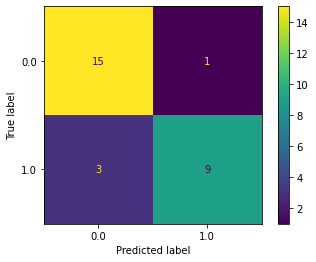

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

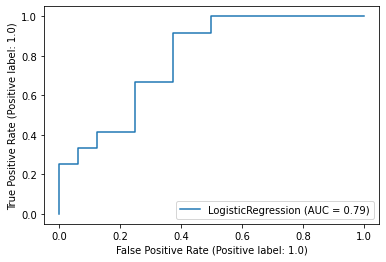

In [19]:
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)

Bonus: Compare how the model compares against a SVM

In [20]:
# Write your solution here
from sklearn import svm

# Train a logistic regression model
model = svm.SVC()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0.]
[1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0.]


In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(
    f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}"
)

Accuracy: 0.8571428571428571, Precision: 0.9, Recall: 0.75, F1 Score: 0.8181818181818182


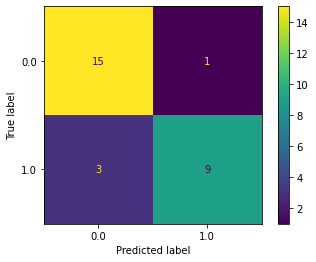

In [22]:
cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

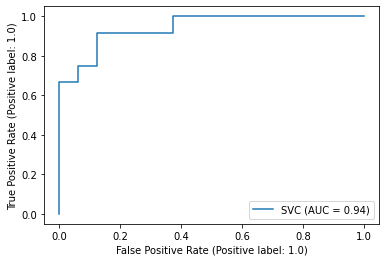

In [23]:
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)